In [21]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV file into a data frame
df = pd.read_csv('C:/Users/Dell/Documents/Business Analytics Year 4/Applied Predictive Analytics DATA4001 2022-23/final4.csv')
# Calculate the correlations with the "%_of_cap" column
correlations = df.corr()["%_of_cap"].sort_values(ascending=False)

# Print the top 10 most highly correlated columns
print(correlations[1:11])


Player salary    0.867615
FG               0.631526
PTS              0.630554
FGA              0.621116
2PA              0.620273
2P               0.619159
FTA              0.596234
FT               0.589748
MP               0.587735
TOV              0.569261
Name: %_of_cap, dtype: float64


In [22]:
#drop the data that is a product of salary and or a product of Minutes played
df = df.drop(columns=["Player salary", "Salary Cap", "Rk", "MP", "TOV", "GS"])
# Calculate the correlations with the "%_of_cap" column
correlations = df.corr()["%_of_cap"].sort_values(ascending=False)

# Print the top 10 most highly correlated columns
print(correlations[1:11])


FG     0.631526
PTS    0.630554
FGA    0.621116
2PA    0.620273
2P     0.619159
FTA    0.596234
FT     0.589748
DRB    0.569192
TRB    0.528390
AST    0.439466
Name: %_of_cap, dtype: float64


In [23]:
# Create the subcategories
offence = df[["FGA", "FG%", "3P", "3P%", "2P", "2P%", "FTA", "FT%", "ORB", "AST"]]
defence = df[["DRB", "BLK", "STL", "TRB"]]
best = df[["FG", "PTS", "FGA", "2PA", "2P", "FTA", "FT", "DRB", "TRB", "AST"]]

In [24]:

import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Load the CSV file into a data frame
df2 = pd.read_csv('C:/Users/Dell/Documents/Business Analytics Year 4/Applied Predictive Analytics DATA4001 2022-23/final4.csv')
df2 = df2.drop(columns=["Player salary", "Salary Cap", "Rk", "MP", "TOV", "GS"])
# Create the subcategories
offence = df2[["FGA", "FG%", "3P", "3P%", "2P", "2P%", "FTA", "FT%", "ORB", "AST"]]
defence = df2[["DRB", "BLK", "STL", "TRB"]]
best = df2[["FG", "PTS", "FGA", "2PA", "2P", "FTA", "FT", "DRB", "TRB", "AST"]]


In [25]:

# Fit a linear regression model on the "offence" subcategory
X = offence
y = df2["%_of_cap"]
model = LinearRegression()
model.fit(X, y)

# Make predictions on the "offence" subcategory
y_pred = model.predict(X)

# Calculate the RMSE and r^2 for the "offence" subcategory
rmse = np.sqrt(mean_squared_error(y, y_pred))
r2 = r2_score(y, y_pred)
# Calculate the MSE for the "offence" subcategory
mse = mean_squared_error(y, y_pred)

# Calculate the degrees of freedom for the "offence" subcategory model
df = len(y) - len(model.coef_) - 1

# Calculate the sample size
n = len(y)

# Calculate the AMSE for the "offence" subcategory model
amse = mse / df * n

# Print the MSE, AMSE, DF, and sample size for the "offence" subcategory model
print("Offence MSE:", mse)
print("Offence AMSE:", amse)
# Print the RMSE and r^2 for the "offence" subcategory
print("Offence RMSE:", rmse)
print("Offence r^2:", r2)

# Fit a linear regression model on the "defence" subcategory
X = defence
y = df2["%_of_cap"]
model = LinearRegression()
model.fit(X, y)

# Make predictions on the "defence" subcategory
y_pred = model.predict(X)

# Calculate the RMSE and r^2 for the "defence" subcategory
rmse = np.sqrt(mean_squared_error(y, y_pred))
r2 = r2_score(y, y_pred)
# Calculate the MSE for the "Defence" subcategory
mse = mean_squared_error(y, y_pred)

# Calculate the degrees of freedom for the "Defence" subcategory model
df = len(y) - len(model.coef_) - 1


# Calculate the AMSE for the "Defence" subcategory model
amse = mse / df * n

# Print the MSE, AMSE, DF, and sample size for the "Defence" subcategory model
print("Defence MSE:", mse)
print("Defence AMSE:", amse)
# Print the RMSE and r^2 for the "offence" subcategory
print("Defence RMSE:", rmse)
print("Defence r^2:", r2)

# Fit a linear regression model on the "Best" subcategory
X = best
y = df2["%_of_cap"]
model = LinearRegression()
model.fit(X, y)

# Make predictions on the "Best" subcategory
y_pred = model.predict(X)

# Calculate the RMSE and r^2 for the "Best" subcategory
rmse = np.sqrt(mean_squared_error(y, y_pred))
r2 = r2_score(y, y_pred)
# Calculate the MSE for the "Best" subcategory
mse = mean_squared_error(y, y_pred)

# Calculate the degrees of freedom for the "Best" subcategory model
df = len(y) - len(model.coef_) - 1

# Calculate the AMSE for the "Best" subcategory model
amse = mse / df * n

# Print the MSE, AMSE, DF, and sample size for the "Best" subcategory model
print("Best MSE:", mse)
print("Best AMSE:", amse)
# Print the RMSE and r^2 for the "Best" subcategory
print("Best RMSE:", rmse)
print("Best r^2:", r2)
print("Total Sample Size:", n)

Offence MSE: 0.0027469338336743943
Offence AMSE: 0.002750734622626648
Offence RMSE: 0.05241119950615893
Offence r^2: 0.4310852894888233
Defence MSE: 0.003071145885400446
Defence AMSE: 0.0030730759670277714
Defence RMSE: 0.0554179202550984
Defence r^2: 0.363938056712111
Best MSE: 0.00262400150049365
Best AMSE: 0.002627632194393704
Best RMSE: 0.05122500854556932
Best r^2: 0.45654568168561505
Total Sample Size: 7961


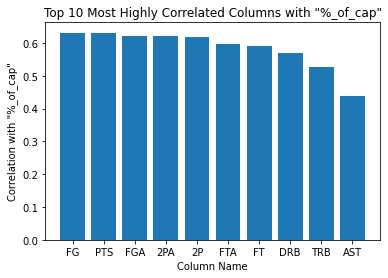

In [26]:
import matplotlib.pyplot as plt

# Select the top 10 most highly correlated columns
top_10_correlations = correlations[1:11]

# Get the column names
column_names = top_10_correlations.index

# Get the values of the top 10 correlations
values = top_10_correlations.values

# Create a bar chart
plt.bar(column_names, values)

# Add a title and axis labels
plt.title('Top 10 Most Highly Correlated Columns with "%_of_cap"')
plt.xlabel('Column Name')
plt.ylabel('Correlation with "%_of_cap"')

# Show the plot
plt.show()


Player salary    0.867615
FG               0.631526
PTS              0.630554
FGA              0.621116
2PA              0.620273
2P               0.619159
FTA              0.596234
FT               0.589748
MP               0.587735
TOV              0.569261
Name: %_of_cap, dtype: float64
FG     0.631526
PTS    0.630554
FGA    0.621116
2PA    0.620273
2P     0.619159
FTA    0.596234
FT     0.589748
DRB    0.569192
TRB    0.528390
AST    0.439466
Name: %_of_cap, dtype: float64


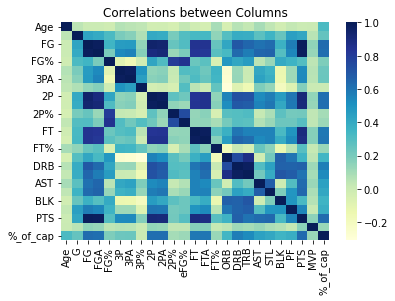

In [27]:
import pandas as pd

# Load the CSV file into a data frame
df_original = pd.read_csv('C:/Users/Dell/Documents/Business Analytics Year 4/Applied Predictive Analytics DATA4001 2022-23/final4.csv')

# Calculate the correlations with the "%_of_cap" column
correlations = df_original.corr()["%_of_cap"].sort_values(ascending=False)

# Print the top 10 most highly correlated columns
print(correlations[1:11])

# Drop the data that is a product of salary and or a product of Minutes played
df_processed = df_original.drop(columns=["Player salary", "Salary Cap", "Rk", "MP", "TOV", "GS"])

# Calculate the correlations with the "%_of_cap" column
correlations = df_processed.corr()["%_of_cap"].sort_values(ascending=False)

# Print the top 10 most highly correlated columns
print(correlations[1:11])

# Create a heatmap of the correlations
sns.heatmap(df_processed.corr(), cmap='YlGnBu')

# Add a title
plt.title('Correlations between Columns')

# Show the plot
plt.show()


In [28]:

from sklearn.model_selection import train_test_split

# split the "offence" subcategory into train and test sets
X_train, X_test, y_train, y_test = train_test_split(offence, df2["%_of_cap"], test_size=0.2, random_state=0)


# create a linear regression model
model = LinearRegression()

# fit the model to the training data
model.fit(X_train, y_train)

# make predictions on the test data
y_pred = model.predict(X_test)

# calculate the MSE, AMSE, RMSE, and R^2 score for each subcategory
mse = mean_squared_error(y_test, y_pred)
amse = np.mean(mean_squared_error(y_test, y_pred))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("AMSE:", amse)
print("RMSE:", rmse)
print("R^2:", r2)


MSE: 0.0029518677895425225
AMSE: 0.0029518677895425225
RMSE: 0.054331094131652845
R^2: 0.4159713789986976


In [29]:
# split the "defence" subcategory into train and test sets
X_train, X_test, y_train, y_test = train_test_split(defence, df2["%_of_cap"], test_size=0.2, random_state=0)
# create a linear regression model
model = LinearRegression()

# fit the model to the training data
model.fit(X_train, y_train)

# make predictions on the test data
y_pred = model.predict(X_test)

# calculate the MSE, AMSE, RMSE, and R^2 score for each subcategory
mse = mean_squared_error(y_test, y_pred)
amse = np.mean(mean_squared_error(y_test, y_pred))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("AMSE:", amse)
print("RMSE:", rmse)
print("R^2:", r2)


MSE: 0.003183856298402875
AMSE: 0.003183856298402875
RMSE: 0.05642567056227932
R^2: 0.3700723284389644


In [30]:
# split the "best" subcategory into train and test sets
X_train, X_test, y_train, y_test = train_test_split(best, df2["%_of_cap"], test_size=0.2, random_state=0)
# create a linear regression model
model = LinearRegression()

# fit the model to the training data
model.fit(X_train, y_train)

# make predictions on the test data
y_pred = model.predict(X_test)

# calculate the MSE, AMSE, RMSE, and R^2 score for each subcategory
mse = mean_squared_error(y_test, y_pred)
amse = np.mean(mean_squared_error(y_test, y_pred))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("AMSE:", amse)
print("RMSE:", rmse)
print("R^2:", r2)

MSE: 0.002793487424307408
AMSE: 0.002793487424307408
RMSE: 0.05285345234048017
R^2: 0.4473070189720183
